## 1. Load network of nutrients from a csv file example

In [4]:
import networkx as nx
import matplotlib.pyplot as plt 
import dzcnapy_plotlib as dzcnapy 
import csv

# Create empty graph
G = nx.Graph()

# Read edges and add them to graph
with open("./data/nutrients.csv") as infile: 
    csv_reader = csv.reader(infile)
    for nutrient, food in csv_reader:
        G.add_edge(nutrient, food)

# Create sets of nutrients and foods for bipartite graph
nutrients = {node for node in G.nodes() if len(node) <= 3}  # Nutrients typically have short names like 'A', 'B12', 'Zn'
foods = set(G.nodes()) - nutrients

# Print some basic information
print("Number of nutrients:", len(nutrients))
print("Number of foods:", len(foods))
print("Total edges:", G.number_of_edges())

Number of nutrients: 11
Number of foods: 30
Total edges: 75


## 1.1. Remove any self loops 

In [5]:
loops = list(nx.selfloop_edges(G, data=True, keys=True))
G.remove_edges_from(loops) 
print(loops)

[('tomatoes', 'tomatoes', {})]


## 1.2 Relabel nodes with Capitalization of first letter

In [7]:
mapping = {node: node.title() for node in G if isinstance(node, str)} 
nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())


['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Yogurt', 'Veg Oils', 'Thiamin', 'Shellfish', 'Poultry', 'Spinach', 'Folates', 'Niacin', 'Riboflavin', 'Beef', 'Wheat', 'Legumes', 'Seeds', 'Mushrooms', 'Whole Grains', 'Nuts', 'Cheese', 'Broccoli', 'Pumpkins', 'Potatoes', 'Kidneys', 'Beans', 'Asparagus', 'Tomatoes', 'Milk', 'Liver', 'Green Leafy Vegs', 'Fatty Fish', 'Eggs', 'Carrots']


## 1.3. Creation of attributes for nodes

- In our little food and nutrition exercise, we have nodes of two types: foods and nutrients. 
- Labeling them for future analysis would be helpful. Let’s create a boolean attribute "nutrient" that is true for nutrients and false for foods. 
- The information about node type was not in the original dataset.

In [12]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
"Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))
nutrient_dict = {node: (node in nutrients) for node in G} 
nx.set_node_attributes(G, name="nutrient", values=nutrient_dict)

In [13]:
print(G.nodes(data=True))

[('A', {'nutrient': True}), ('B12', {'nutrient': True}), ('B6', {'nutrient': True}), ('C', {'nutrient': True}), ('Ca', {'nutrient': True}), ('Cu', {'nutrient': True}), ('D', {'nutrient': True}), ('E', {'nutrient': True}), ('Mn', {'nutrient': True}), ('Se', {'nutrient': True}), ('Zn', {'nutrient': True}), ('Yogurt', {'nutrient': False}), ('Veg Oils', {'nutrient': False}), ('Thiamin', {'nutrient': True}), ('Shellfish', {'nutrient': False}), ('Poultry', {'nutrient': False}), ('Spinach', {'nutrient': False}), ('Folates', {'nutrient': True}), ('Niacin', {'nutrient': True}), ('Riboflavin', {'nutrient': True}), ('Beef', {'nutrient': False}), ('Wheat', {'nutrient': False}), ('Legumes', {'nutrient': False}), ('Seeds', {'nutrient': False}), ('Mushrooms', {'nutrient': False}), ('Whole Grains', {'nutrient': False}), ('Nuts', {'nutrient': False}), ('Cheese', {'nutrient': False}), ('Broccoli', {'nutrient': False}), ('Pumpkins', {'nutrient': False}), ('Potatoes', {'nutrient': False}), ('Kidneys', {'n

## 1.4. Network visualization using matplotlib

In [14]:
import matplotlib.pyplot as plt

In [15]:
colors = ["yellow" if n[1]["nutrient"] else "pink" for n in G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

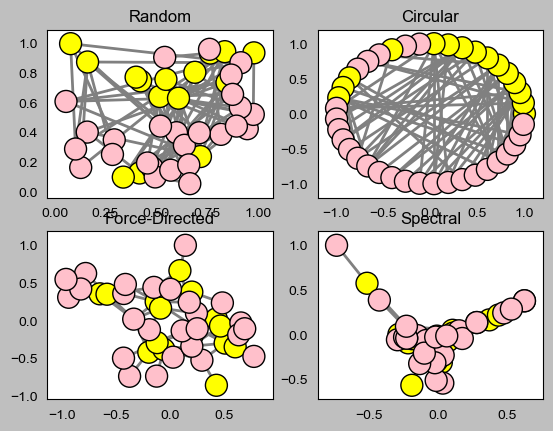

In [16]:
# Draw four layouts in four subplots
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout,
nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral") 
for plot, layout, title in zip(subplots, layouts, titles):
       pos = layout(G)
       nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False,
                        **dzcnapy.medium_attrs)
       plot.set_title(title)
       dzcnapy.set_extent(pos, plot)